In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV


In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")


In [3]:
def feature_engineering(df):
    df["Title"] = df["Name"].str.extract(" ([A-Za-z]+)\.", expand=False)
    df["Title"] = df["Title"].replace(['Mlle', 'Ms'], 'Miss')
    df["Title"] = df["Title"].replace(['Mme'], 'Mrs')
    
    df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
    
    df["Fare"] = df["Fare"].fillna(df["Fare"].median())
    df["Age"] = df["Age"].fillna(df["Age"].median())
    
    return df

train_data = feature_engineering(train_data)
test_data = feature_engineering(test_data)


In [5]:
num_features = ["Age", "Fare", "FamilySize"]
cat_features = ["Pclass", "Sex", "Title", "Embarked"]

num_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(transformers=[
    ("num", num_transformer, num_features),
    ("cat", cat_transformer, cat_features)
])


In [6]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

voting_clf = VotingClassifier(estimators=[
    ('rf', rf),
    ('gb', gb)
], voting='soft')

model_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", voting_clf)
])


In [7]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

voting_clf = VotingClassifier(estimators=[
    ('rf', rf),
    ('gb', gb)
], voting='soft')

model_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", voting_clf)
])


In [8]:
X = train_data[num_features + cat_features]
y = train_data["Survived"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model_pipeline.fit(X_train, y_train)

cv_scores = cross_val_score(model_pipeline, X_train, y_train, cv=5, scoring="accuracy")
print("Cross-validation accuracy:", cv_scores.mean())


Cross-validation accuracy: 0.8244065793361568


In [9]:
test_features = test_data[num_features + cat_features]
predictions = model_pipeline.predict(test_features)

submission = pd.DataFrame({
    "PassengerId": test_data["PassengerId"],
    "Survived": predictions
})

submission.to_csv("submission.csv", index=False)
print("Submission saved!")


Submission saved!


/var/folders/qt/l4t88t5n1js8hclmj62xw01c0000gn/T/ipykernel_25279/692132810.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train_data["Survived"], palette="coolwarm")


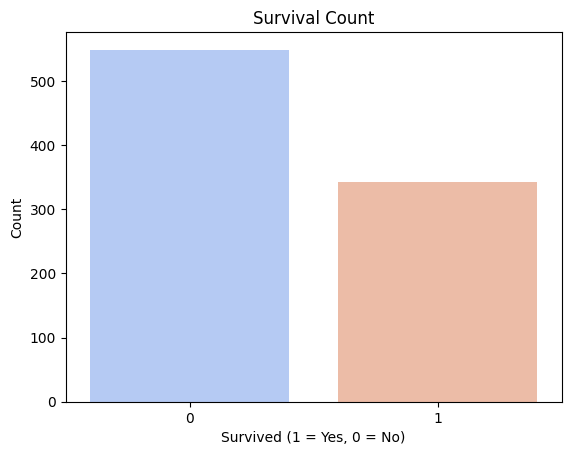

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=train_data["Survived"], palette="coolwarm")
plt.title("Survival Count")
plt.xlabel("Survived (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()


/var/folders/qt/l4t88t5n1js8hclmj62xw01c0000gn/T/ipykernel_25279/3358864968.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Sex", y="Survived", data=train_data, palette="coolwarm")


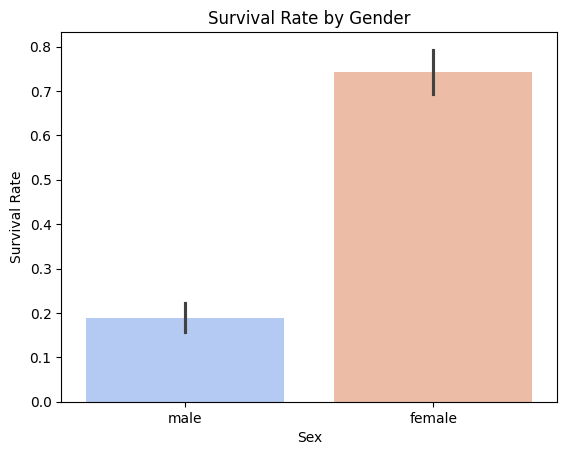

In [11]:
sns.barplot(x="Sex", y="Survived", data=train_data, palette="coolwarm")
plt.title("Survival Rate by Gender")
plt.xlabel("Sex")
plt.ylabel("Survival Rate")
plt.show()


/var/folders/qt/l4t88t5n1js8hclmj62xw01c0000gn/T/ipykernel_25279/4155172683.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Pclass", y="Survived", data=train_data, palette="viridis")


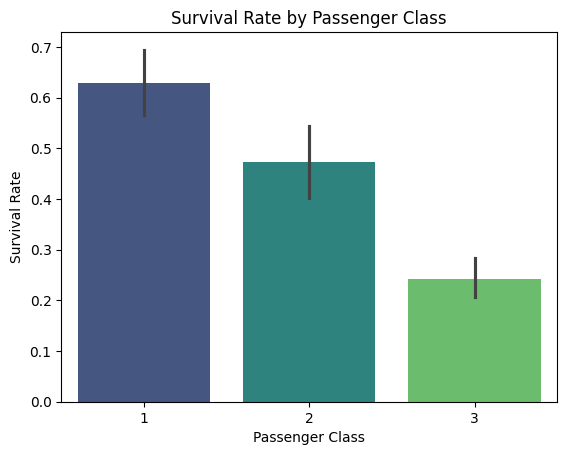

In [12]:
sns.barplot(x="Pclass", y="Survived", data=train_data, palette="viridis")
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.show()


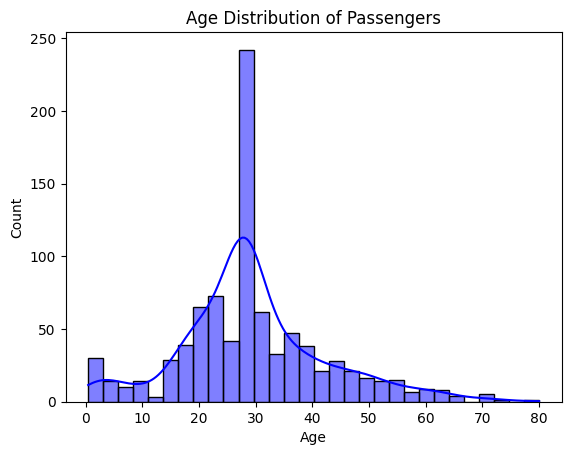

In [13]:
sns.histplot(train_data["Age"], bins=30, kde=True, color="blue")
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


/var/folders/qt/l4t88t5n1js8hclmj62xw01c0000gn/T/ipykernel_25279/867079296.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="FamilySize", y="Survived", data=train_data, palette="magma")


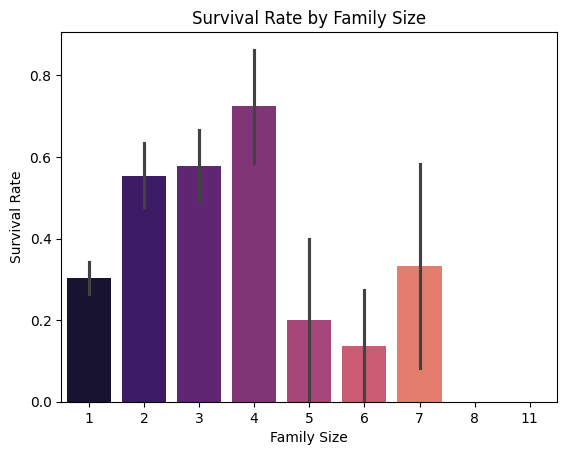

In [14]:
sns.barplot(x="FamilySize", y="Survived", data=train_data, palette="magma")
plt.title("Survival Rate by Family Size")
plt.xlabel("Family Size")
plt.ylabel("Survival Rate")
plt.show()
